## Thyroid Detection for Pregnant Woman

In [1]:
import pandas as pd
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
zip_file_path = "thyroidism.zip"

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("hypothyroidism")

# Assuming the zip file contains a CSV file, load it into a DataFrame
# You may need to adjust the filename depending on the structure of your zip file
train_file_path = "hypothyroidism/hypothyroid.csv"

In [3]:
data = pd.read_csv(train_file_path)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

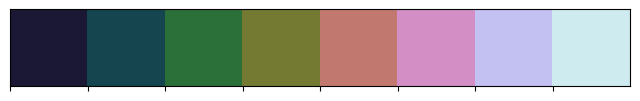

In [ ]:
sns.palplot(sns.color_palette("cubehelix", 8))

## Data exploration




#### Observations:

1.   All values are marked as object, need to refine with number and category
2.   There is no empty values
3.   In our dataset, Missing values are marked as ?.


In [5]:
data_info = pd.DataFrame({
      'Data_Type': data.dtypes,
      'Missing_Values': data.isna().sum(),
      '?_Values' : data.isin(['?']).sum()
    })

print(data_info)

                          Data_Type  Missing_Values  ?_Values
age                          object               0         1
sex                          object               0       150
on thyroxine                 object               0         0
query on thyroxine           object               0         0
on antithyroid medication    object               0         0
sick                         object               0         0
pregnant                     object               0         0
thyroid surgery              object               0         0
I131 treatment               object               0         0
query hypothyroid            object               0         0
query hyperthyroid           object               0         0
lithium                      object               0         0
goitre                       object               0         0
tumor                        object               0         0
hypopituitary                object               0         0
psych   

### Transform categorical data

In [6]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for x in data.columns:
    data[x]=enc.fit_transform(data[x])


### Remove Duplicate data

In [7]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3711 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        3711 non-null   int64
 1   sex                        3711 non-null   int64
 2   on thyroxine               3711 non-null   int64
 3   query on thyroxine         3711 non-null   int64
 4   on antithyroid medication  3711 non-null   int64
 5   sick                       3711 non-null   int64
 6   pregnant                   3711 non-null   int64
 7   thyroid surgery            3711 non-null   int64
 8   I131 treatment             3711 non-null   int64
 9   query hypothyroid          3711 non-null   int64
 10  query hyperthyroid         3711 non-null   int64
 11  lithium                    3711 non-null   int64
 12  goitre                     3711 non-null   int64
 13  tumor                      3711 non-null   int64
 14  hypopituitary              37

In [8]:
measurement_categories = ['TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured']


### Histogram for important features

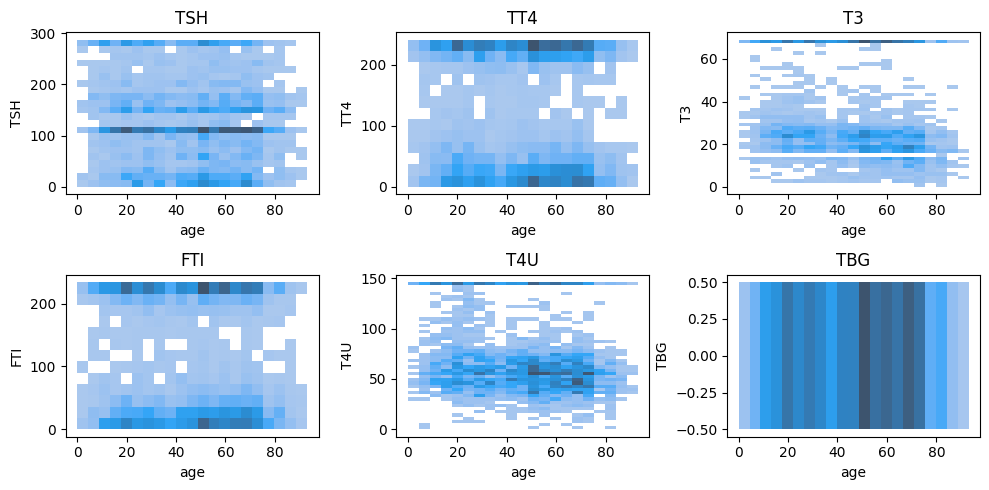

In [9]:
columns_to_plot = ['TSH', 'T4U','T3', 'FTI', 'TT4', 'TBG']

fig, axes = plt.subplots(2, 3, figsize=(10, 5))

for i, column in enumerate(columns_to_plot):
    sns.histplot(x='age', y =column, data=data, ax=axes[i%2][i%3])
    axes[i%2][i%3].set_title(column)

plt.tight_layout()
plt.show()

### BoxPlot for important features

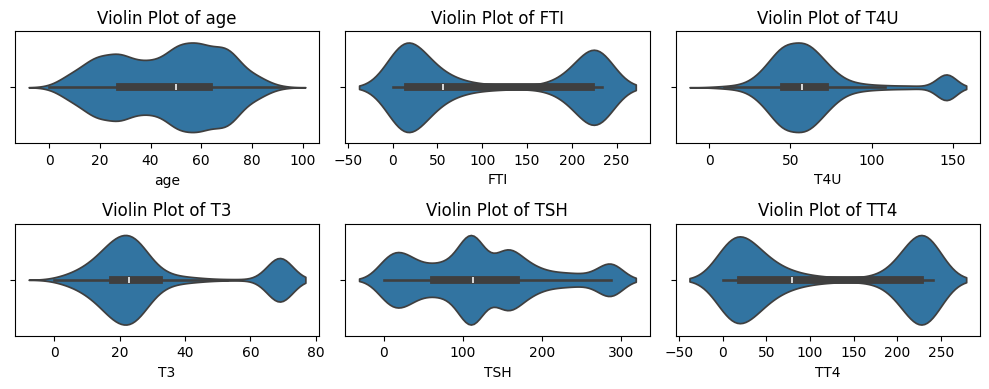

In [10]:
columns_to_plot = ['age', 'TSH', 'T4U','T3', 'FTI', 'TT4']

fig, axes = plt.subplots(2, 3, figsize=(10, 4))

for i, column in enumerate(columns_to_plot):
    sns.violinplot(x=column, data=data, ax=axes[i%2][i%3])
    axes[i%2][i%3].set_title(f'Violin Plot of {column}')

plt.tight_layout()
plt.show()

### Headmap among categorical columns

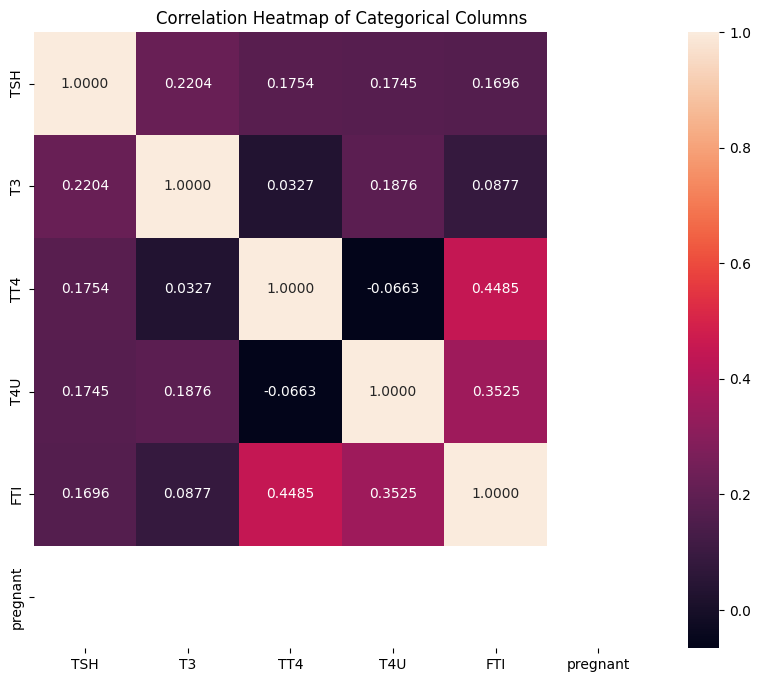

In [11]:
# Calculate the correlation matrix
columns = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'pregnant']
categorical_data = data[data['sex'] == 2][columns]
correlation_matrix = categorical_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", square=True)
plt.title('Correlation Heatmap of Categorical Columns')
plt.show()

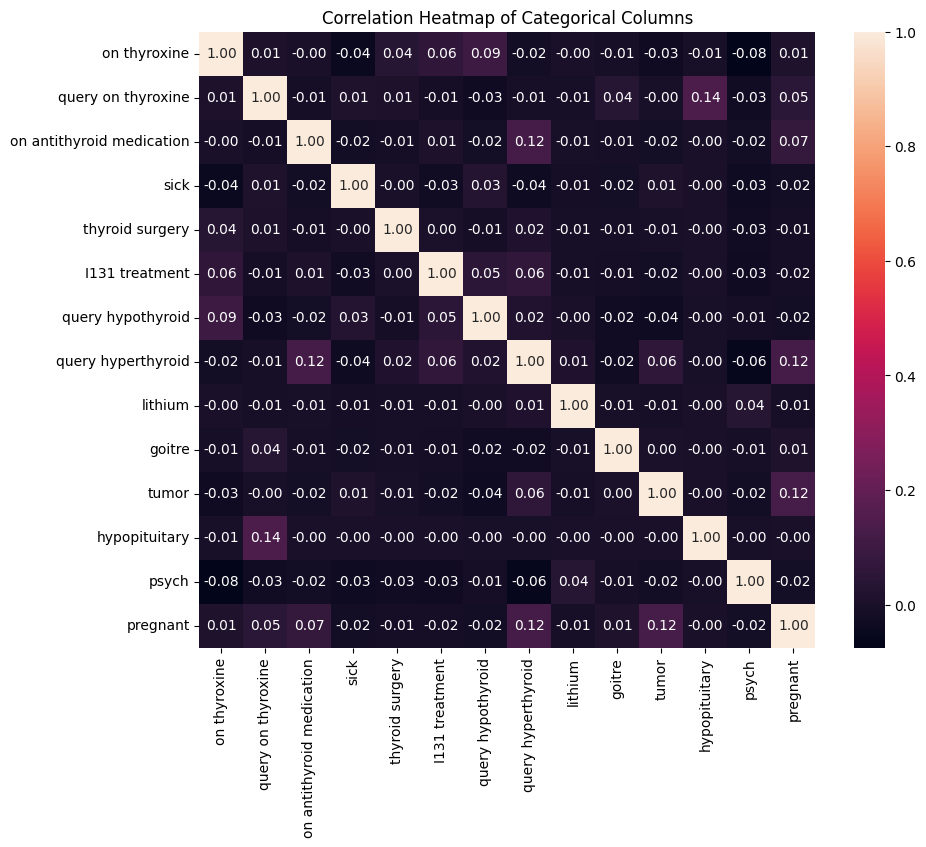

In [12]:
columns = ['on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'pregnant']

categorical_data = data[columns]
correlation_matrix = categorical_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True)
plt.title('Correlation Heatmap of Categorical Columns')
plt.show()

### Categorical Data measured/not measured

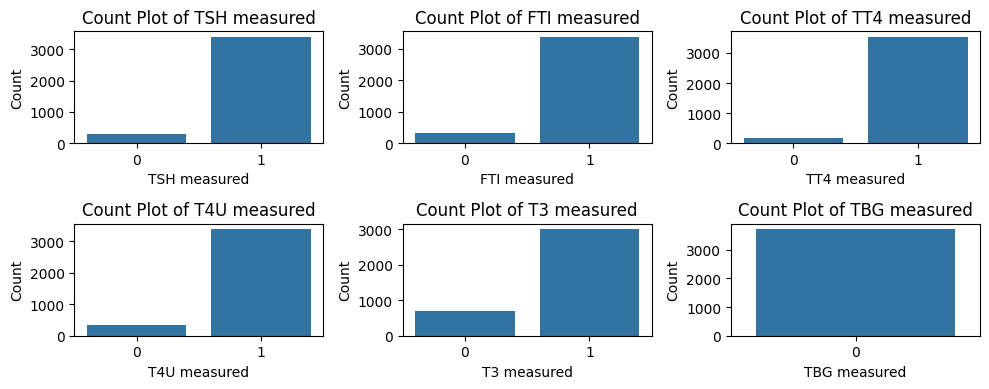

In [13]:

# List of categorical columns
categorical_columns = ['TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured']

# Set up the figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 4))

# Iterate over each categorical column and create count plots
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=data, ax=axes[i%2][i%3])
    axes[i%2][i%3].set_title(f'Count Plot of {column}')
    axes[i%2][i%3].set_xlabel(column)
    axes[i%2][i%3].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

### Lets analyze different hormone level for female correlate to pregnant

In [14]:
female_data = data[data['sex'] > 0]

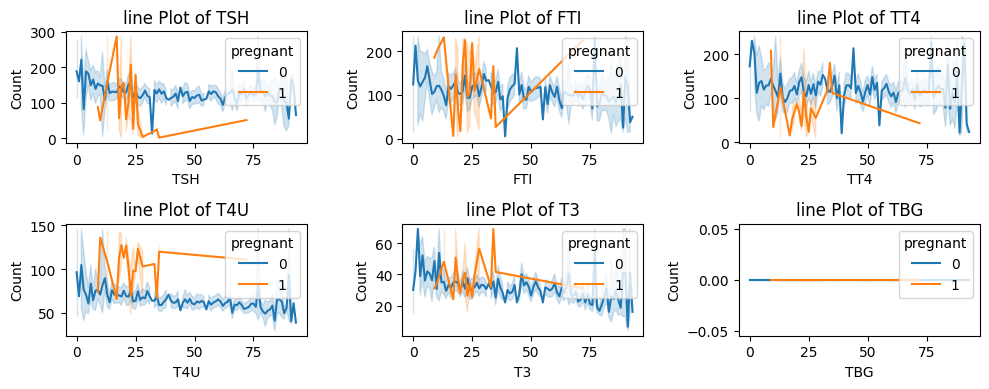

In [15]:
categorical_columns = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
# Set up the figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 4))

# Iterate over each categorical column and create count plots
for i, column in enumerate(categorical_columns):
    sns.lineplot(x='age', y=column, hue='pregnant', data=female_data, ax=axes[i%2][i%3])
    axes[i%2][i%3].set_title(f'line Plot of {column}')
    axes[i%2][i%3].set_xlabel(column)
    axes[i%2][i%3].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Data cleaning and Feature Engineering

### Updating numerical columns MinMax scaling

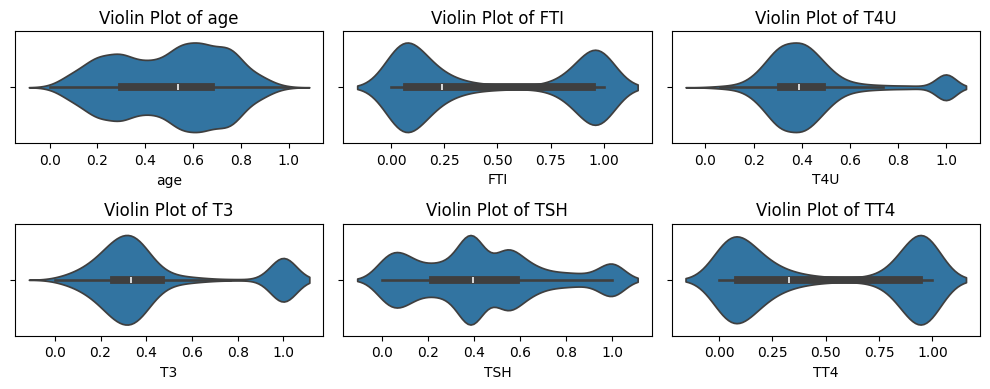

In [16]:
columns_to_minmax = ['age', 'TSH', 'T4U','T3', 'FTI', 'TT4']

for feature in columns_to_minmax:
  data_range = data[feature].max()-data[feature].min()
  data_diff = data[feature]-data[feature].min()
  data[feature] = (data_diff)/(data_range)


fig, axes = plt.subplots(2, 3, figsize=(10, 4))

for i, column in enumerate(columns_to_plot):
    sns.violinplot(x=column, data=data, ax=axes[i%2][i%3])
    axes[i%2][i%3].set_title(f'Violin Plot of {column}')

plt.tight_layout()
plt.show()

### Since there is no measured value of TBG Measured column
1. Remove **TBG Measured** column
2. Remove **TBG** column

In [17]:
data.drop(columns=['TBG measured', 'TBG'])

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,binaryClass
0,0.365591,1,0,0,0,0,0,0,0,0,...,1,0.391304,1,0.116183,1,0.493151,1,0.042735,1,1
1,0.161290,1,0,0,0,0,0,0,0,0,...,1,0.318841,1,0.012448,0,1.000000,0,1.000000,4,1
2,0.430108,2,0,0,0,0,0,0,0,0,...,0,1.000000,1,0.041494,1,0.328767,1,0.094017,4,1
3,0.720430,1,1,0,0,0,0,0,0,0,...,1,0.289855,1,0.344398,0,1.000000,0,1.000000,4,1
4,0.720430,1,0,0,0,0,0,0,0,0,...,1,0.173913,1,0.834025,1,0.301370,1,0.850427,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0.236559,1,0,0,0,0,0,0,0,0,...,0,1.000000,0,1.000000,0,1.000000,0,1.000000,4,1
3768,0.688172,1,0,0,0,0,0,0,0,0,...,1,0.333333,1,0.112033,1,0.452055,1,0.068376,3,1
3769,0.763441,1,0,0,0,0,0,0,0,0,...,1,0.275362,1,0.058091,1,0.445205,1,0.025641,4,1
3770,0.741935,2,0,0,0,0,0,0,0,0,...,1,0.318841,1,0.921162,1,0.349315,1,0.935897,3,1


## Training and result analysis

### Spliting train and Test

In [18]:
y=data['binaryClass']
x=data.drop(['binaryClass'],axis=1)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2968, 29)
(743, 29)
(2968,)
(743,)


### Build measurement graph generate function

In [20]:
def measurementHistogram(name, precision, recall, f1_score):

  class_labels = ['Class 0', 'Class 1']

  data = {
      'Class': class_labels * 3,
      'Metric': ['Precision'] * 2 + ['Recall'] * 2 + ['F1-score'] * 2,
      'Score': precision + recall + f1_score
  }
  df = pd.DataFrame(data)

  # Plot histogram using seaborn
  sns.barplot(data=df, x='Class', y='Score', hue='Metric')
  plt.title('Performance Metrics for Each Class')
  plt.xlabel('Class')
  plt.ylabel('Score')
  plt.show()

### XGB Classifier

In [22]:
xgb_model = XGBClassifier(learning_rate= 0.05,
                          max_depth= 5,
                          n_estimators= 200,
                          subsample= 0.6)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
predictions= xgb_model.predict(X_test)
percentage=xgb_model.score(X_test,y_test)

print(classification_report(y_test, predictions, digits= 4))

              precision    recall  f1-score   support

           0     0.9808    0.8793    0.9273        58
           1     0.9899    0.9985    0.9942       685

    accuracy                         0.9892       743
   macro avg     0.9853    0.9389    0.9607       743
weighted avg     0.9892    0.9892    0.9890       743



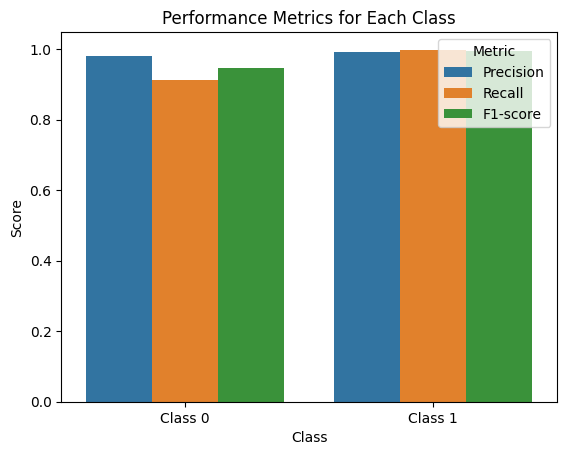

In [24]:
measurementHistogram(name='XGBClassifier', precision = [0.9815,0.9927], recall = [0.9138, 0.9985], f1_score = [0.9464 , 0.9956])

### XGB Parameter finding

In [25]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

xgb_model = xgb.XGBClassifier()

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

random_search.fit(X_train, y_train)

print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.0946761349351897, 'max_depth': 7, 'n_estimators': 183, 'subsample': 0.9590504341628535}
Best score:  0.9855116652755775


### Gradient boosting classifier

In [26]:
clssifier = GradientBoostingClassifier(learning_rate=0.3,
                                       min_samples_split=300,
                                       min_samples_leaf=10,
                                       max_depth=8,
                                       subsample=0.8,
                                       random_state=10)
clssifier.fit(X_train, y_train)


y_pred = clssifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Classification Report:
               precision    recall  f1-score   support

           0     0.9643    0.9310    0.9474        58
           1     0.9942    0.9971    0.9956       685

    accuracy                         0.9919       743
   macro avg     0.9792    0.9641    0.9715       743
weighted avg     0.9918    0.9919    0.9919       743



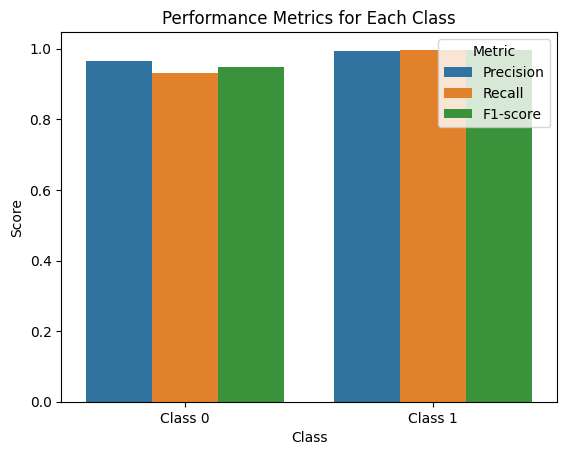

In [27]:
measurementHistogram(name='XGBClassifier', precision = [0.9643, 0.9942], recall = [0.9310, 0.9971], f1_score = [0.9474 , 0.9956])

In [28]:
gb_clssifier = GradientBoostingClassifier()
gb_clssifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [30]:
# Make predictions
y_pred = gb_clssifier.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Accuracy Score: {0:0.5f}\n".format(accuracy_score(y_test, y_pred)))

Classification Report:
               precision    recall  f1-score   support

           0     0.9804    0.8621    0.9174        58
           1     0.9884    0.9985    0.9935       685

    accuracy                         0.9879       743
   macro avg     0.9844    0.9303    0.9554       743
weighted avg     0.9878    0.9879    0.9875       743

Accuracy Score: 0.98789



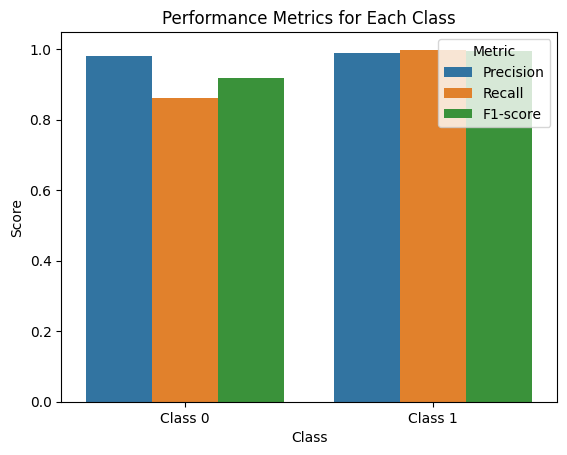

In [31]:
measurementHistogram(name='GB_clssifier', precision = [0.9804, 0.9884], recall = [0.8621, 0.9985], f1_score = [0.917 , 0.9935])

### Random forest classifier

In [34]:
rf_classifier = RandomForestClassifier(max_depth=100,
                                       min_samples_split = 5,
                                       n_estimators= 50)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9688    0.5345    0.6889        58
           1     0.9620    0.9985    0.9799       685

    accuracy                         0.9623       743
   macro avg     0.9654    0.7665    0.8344       743
weighted avg     0.9626    0.9623    0.9572       743



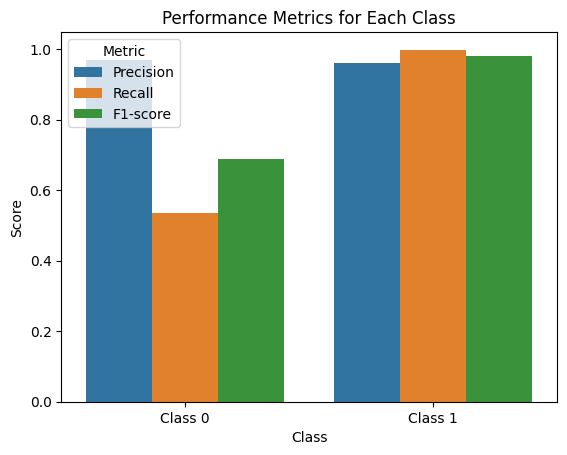

In [43]:
measurementHistogram('RandomForestClassifier', [0.9688,0.9620], [0.5345, 0.9985], [ 0.6889, 0.9799] )

### RandomForest Parameter finding

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Define hyperparameters to tune
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate on test set
print("Test set F1-score: ", grid_search.score(X_test, y_test))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Test set F1-score:  0.9834413246940245


### Histogram Gradient Boosting Classifier

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

hist_gradient_boosting = HistGradientBoostingClassifier()

hist_gradient_boosting.fit(X_train, y_train)

y_pred = hist_gradient_boosting.predict(X_test)


In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.4f}".format(accuracy))

# Generate and print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9919
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.99      1.00      1.00       685

    accuracy                           0.99       743
   macro avg       0.98      0.96      0.97       743
weighted avg       0.99      0.99      0.99       743



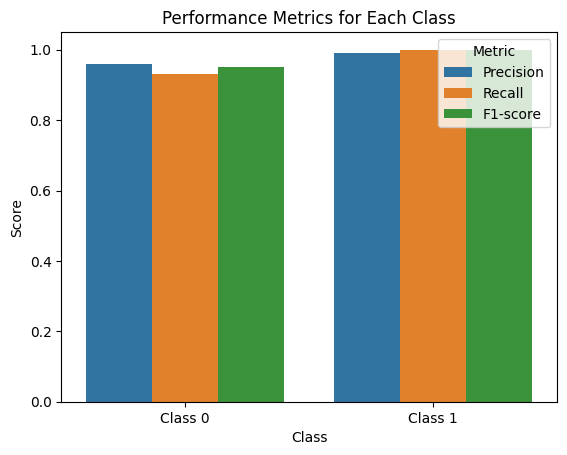

In [42]:
measurementHistogram('HistGradientBoostingClassifier', [ 0.96, 0.99],[0.93, 1.00], [0.95, 1.00])

## Final Results

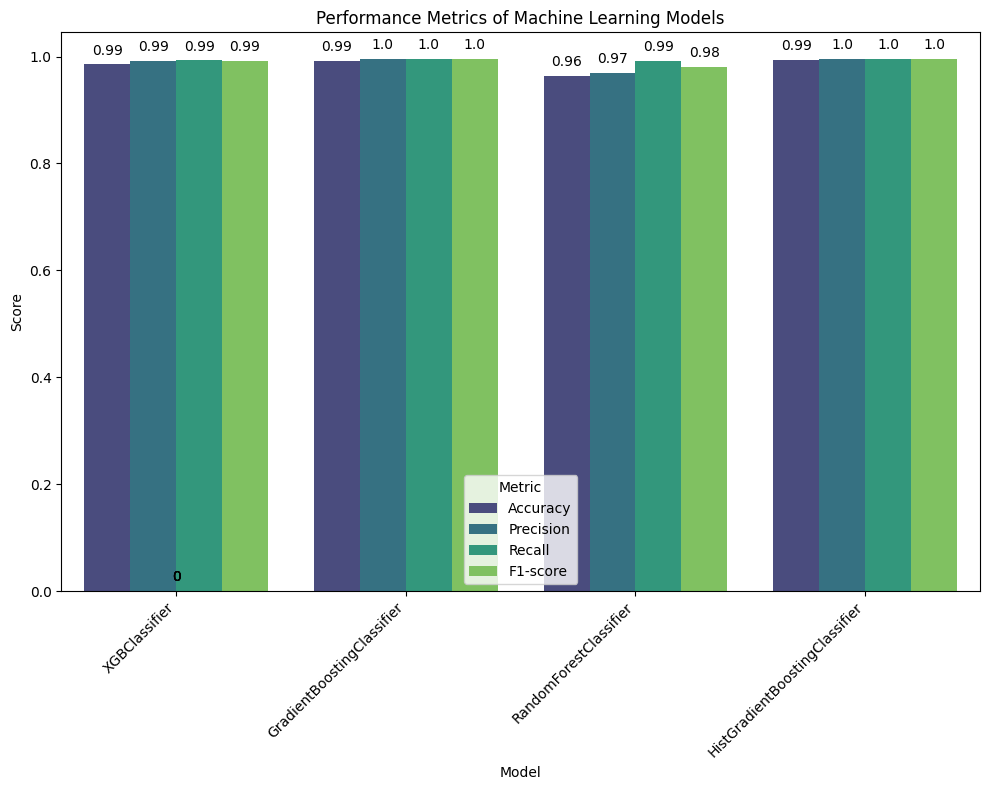

In [52]:
# Data
data = {
    "Model": ["XGBClassifier", "GradientBoostingClassifier", "RandomForestClassifier", "HistGradientBoostingClassifier"],
    "Accuracy": [0.9852, 0.9919, 0.9637, 0.9930],
    "Precision": [0.9913, 0.9956, 0.9700, 0.9956],
    "Recall": [0.9927, 0.9956, 0.9912, 0.9956],
    "F1-score": [0.9920, 0.9956, 0.9805, 0.9956]
}


df = pd.DataFrame(data)

df_melted = df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Model", y="Score", hue="Metric", data=df_melted, palette="viridis")
plt.title("Performance Metrics of Machine Learning Models")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metric")

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()